# BlazeForecast

An innovative fire prediction system designed to safeguard communities from the threat of wildfires. Utilizing advanced machine learning algorithms, 'BlazeForecast' analyzes environmental factors such as temperature, humidity, wind speed, and more to provide accurate predictions of fire outbreaks.

Information to Dataset:

The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

These fields represent environmental and meteorological features commonly used in predicting forest fires. Here's the meaning of each field:

#Temperature:

This is the air temperature in degrees Celsius. Higher temperatures can contribute to the drying of vegetation, increasing the risk of fires.

#Relative Humidity (RH):

RH represents the percentage of moisture in the air relative to the maximum amount the air could hold at that temperature. Low humidity levels make vegetation more susceptible to ignition.

#Wind Speed (Ws):

Wind speed is the rate at which air moves. Higher wind speeds can accelerate the spread of fires by carrying embers and flames.

#Rain:

This is the amount of rainfall in millimeters. Rainfall can help mitigate the risk of fires by wetting the vegetation.

#Fine Fuel Moisture Code (FFMC):

FFMC is a numeric rating of the moisture content of litter and other cured fine fuels. It is influenced by temperature, humidity, wind, and rainfall. Lower FFMC values indicate drier conditions.

#Duff Moisture Code (DMC):

DMC represents the moisture content of the upper organic layer (duff layer) in the soil. It is influenced by temperature and precipitation. Higher DMC values indicate drier conditions.

#Drought Code (DC):

DC is a numeric rating of the soil moisture content in the mineral soil. It reflects the long-term drought effects on the forest. Higher DC values indicate drier conditions.

#Initial Spread Index (ISI):

ISI is a numeric rating of the expected rate of fire spread. It considers wind speed, FFMC, and the bui (Buildup Index). Higher ISI values indicate a higher potential for rapid fire spread.

#Buildup Index (BUI):

BUI is a numeric rating of the total amount of fuel available for combustion. It integrates DMC and DC values. Higher BUI values indicate a greater potential for intense and sustained fires.

#Fire Weather Index (FWI):

FWI is an overall rating of fire danger. It combines FFMC, DMC, DC, and ISI. Higher FWI values indicate increased fire danger.

### Data Cleansing and Visulaization

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('forest_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [13]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [14]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [15]:
to_convert = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']
df[to_convert] = df[to_convert].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 21.0+ KB


In [18]:
dfUpdate = df.drop(['day','month','year'],axis=1)
dfUpdate.sample(6)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
206,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,fire
83,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,fire
171,36,29,18,0.0,93.9,39.6,80.6,18.5,39.5,30.0,fire
207,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,fire
21,31,67,17,0.1,79.1,7.0,39.5,2.4,9.7,2.3,not fire
59,31,79,15,0.0,85.4,28.5,136.0,4.7,37.4,10.7,fire


In [19]:
numeric_df = dfUpdate.select_dtypes(include=['number'])
numeric_df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


In [20]:
dfUpdate['Classes'] = dfUpdate['Classes'].str.strip()
x1=dfUpdate['Classes']
x1.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [27]:
#Y_encoded = pd.get_dummies(Y, columns=["Classes"])
#Y_encoded = Y_encoded.astype(int)
#Y_encoded

#dfUpdate['Classes']=np.where(dfUpdate['Classes'].str.contains('not fire'),0,1)
dfUpdate.sample(6)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
185,38,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,1
217,30,58,12,4.1,66.1,4.0,8.4,1.0,3.9,0.4,0
90,35,70,17,0.8,72.7,25.2,180.4,1.7,37.4,4.2,0
121,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0
127,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,1
77,37,52,18,0.0,89.3,16.0,100.7,9.7,22.9,14.6,1


In [28]:
X = dfUpdate.drop("FWI", axis=1)
Y = dfUpdate["FWI"]

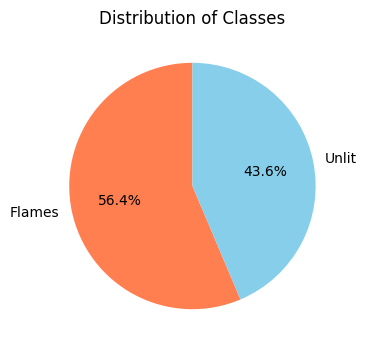

In [29]:
# Count the occurrences of each class
class_counts = dfUpdate['Classes'].value_counts()

# Plotting the pie chart
classlabels=["Flames","Unlit"]
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=classlabels, autopct='%1.1f%%', startangle=90, colors=['coral', 'skyblue'])
plt.title('Distribution of Classes')
plt.show()

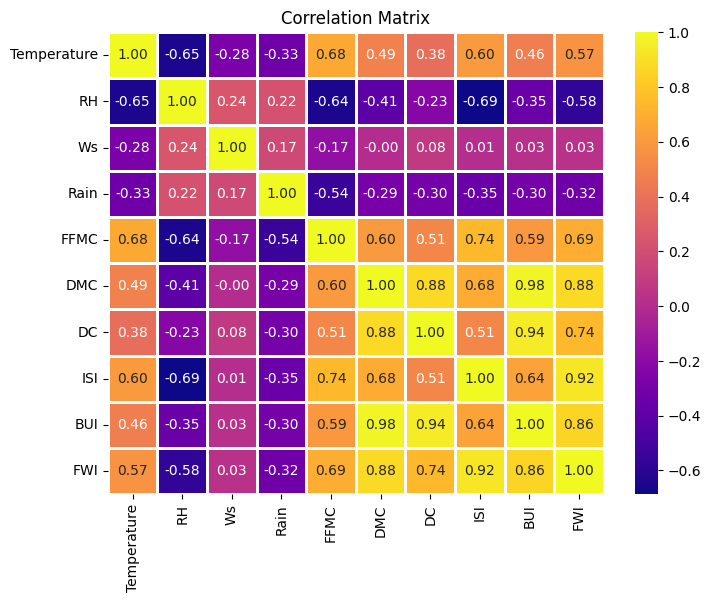

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma', fmt=".2f", linewidths=0.75)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#sns.set(style="ticks")
#dfUpdate.hist(bins=50,figsize=(15,10))
#plt.show()

### Splitting and Standard Scaling of Data

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [32]:
X_train.shape,X_test.shape

((194, 10), (49, 10))

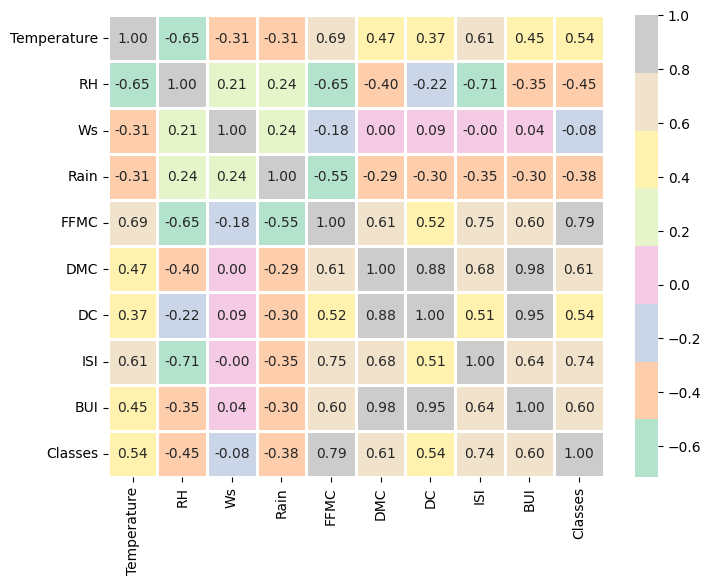

In [33]:
#X_train = X_train.select_dtypes(include=['number'])
corr=X_train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Pastel2', fmt=".2f", linewidths=0.75)
plt.show()

In [34]:
def cor(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features=cor(X_train,0.85)

In [36]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((194, 8), (49, 8))

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Linear Regression

In [38]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [39]:
Y_pred=model.predict(X_test_scaled)

In [40]:
mse = mean_squared_error(Y_test, Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean Absolute error", mae)
print(f"Mean Squared Error: {mse}")
print("R2 Score", score)

Mean Absolute error 0.5117893923448024
Mean Squared Error: 0.6973545616016176
R2 Score 0.9769913929101306


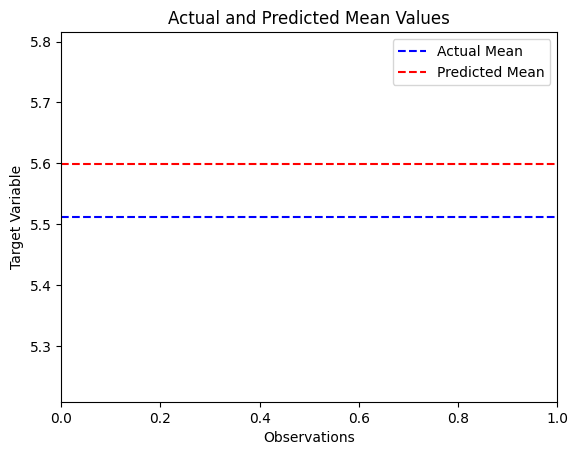

In [41]:
mean_test = np.mean(Y_test)
mean_pred = np.mean(Y_pred)
plt.axhline(mean_test, color='blue', linestyle='--', label='Actual Mean')
plt.axhline(mean_pred, color='red', linestyle='--', label='Predicted Mean')

plt.xlabel('Observations')
plt.ylabel('Target Variable')
plt.title('Actual and Predicted Mean Values')
plt.legend()

plt.show()

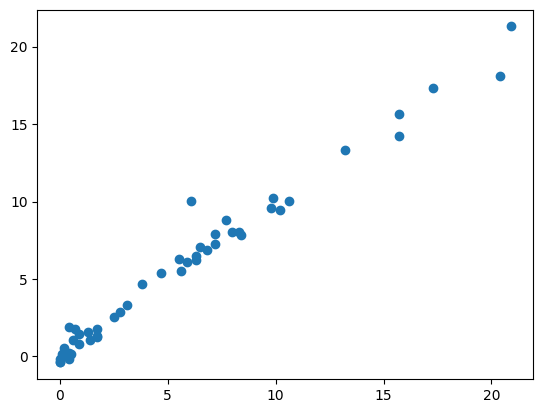

In [42]:
plt.scatter(Y_test,Y_pred)

In [43]:
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 7.420103092783505
Coefficients: [ 4.17777646e-03 -2.59292658e-02  5.19044601e-02 -6.64800826e-02
 -8.18385722e-01  3.78578220e+00  4.87453456e+00  3.81238621e-01]


### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
target = 'Classes'

df['Classes'] = df['Classes'].str.strip()
df['BinaryClasses'] = np.where(df['Classes'] == 'fire', 1, 0)


X_train, X_test, y_train, y_test = train_test_split(df[features], df['BinaryClasses'], test_size=0.2, random_state=0)

modelLog = LogisticRegression(max_iter=1000)
modelLog.fit(X_train, y_train)

y_pred = modelLog.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9795918367346939

Confusion Matrix:
[[23  0]
 [ 1 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        26

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



In [49]:
new_data = {
    'Temperature': 30.0,
    'RH': 53.0,
    'Ws': 15.0,
    'Rain': 1.1,
    'FFMC': 65.0,
    'DMC': 3.4,
    'DC': 7.0,
    'ISI': 1.2,
    'BUI': 4.2,
    'FWI': 0.4
}

df_new = pd.DataFrame([new_data])
y_pred_new = modelLog.predict(df_new[features])
print("\nPredicted class for the data provided:\t",y_pred_new)

if y_pred_new==1:
    print("\nNature seems to be clearing its throat with a symphony of dry leaves and crackling twigs.\nIts hinting at an imminent forest inferno")
else:
    print("\nNO need for fire extinguishers today...!\nThe predictor is telling us that forest gets to relax without the worry of a fiery surprise")


Predicted class for the data provided:	 [0]

NO need for fire extinguishers today...!
The predictor is telling us that forest gets to relax without the worry of a fiery surprise


In [50]:
from sklearn.model_selection import cross_val_score

X = df[features]
y = df[target]

cv_scores = cross_val_score(modelLog, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.97959184 0.93877551 0.93877551 0.97916667 0.95833333]
Mean Accuracy: 0.9589285714285714


### Naive Bayes Classifier

In [51]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("\nNaive Bayes Confusion Matrix:")
print(conf_matrix_nb)
print("\nNaive Bayes Classification Report:")
print(classification_rep_nb)

Naive Bayes Accuracy: 0.9591836734693877

Naive Bayes Confusion Matrix:
[[22  1]
 [ 1 25]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.96      0.96      0.96        26

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49

